In [ ]:
import pandas as pd


***Step 1: Import and merge all the three datasets***

In [ ]:
#Reading English to German files

with open('C:\\Users\\seshabhattark\\AIML\\Machine_Translation_Dataset\\commoncrawl_en_de.txt', encoding='utf-8') as f:
    commoncrawl_en_de_df = f.read()
with open('C:\\Users\\seshabhattark\\AIML\\Machine_Translation_Dataset\\europarl-v7_en_de.txt', encoding='utf-8') as f:
    europarl_en_de_df = f.read()
with open('C:\\Users\\seshabhattark\\AIML\\Machine_Translation_Dataset\\news-commentary-v9_en_de.txt', encoding='utf-8') as f:
    news_commentary_en_de_df = f.read()

# Reading German to English files

with open('C:\\Users\\seshabhattark\\AIML\\Machine_Translation_Dataset\\news-commentary-v9_de_en.txt', encoding='utf-8') as f:
    news_commentary_de_en_df = f.read()
with open('C:\\Users\\seshabhattark\\AIML\\Machine_Translation_Dataset\\commoncrawl_de_en.txt', encoding='utf-8') as f:
    commoncrawl_de_en_df = f.read()
with open('C:\\Users\\seshabhattark\\AIML\\Machine_Translation_Dataset\\europarl-v7_de_en.txt', encoding='utf-8') as f:
    europarl_de_en_df = f.read()

In [ ]:
# Close the text files
f.close()

#### **Merge all German datasets**

In [ ]:
merged_en_df = commoncrawl_en_de_df + europarl_en_de_df + news_commentary_en_de_df

In [ ]:
merged_en_df[:1000]

'iron cement is a ready for use paste which is laid as a fillet by putty knife or finger in the mould edges (corners) of the steel ingot mould.\niron cement protects the ingot against the hot, abrasive steel casting process.\na fire restant repair cement for fire places, ovens, open fireplaces etc.\nConstruction and repair of highways and...\nAn announcement must be commercial character.\nGoods and services advancement through the P.O.Box system is NOT ALLOWED.\nDeliveries (spam) and other improper information deleted.\nTranslator Internet is a Toolbar for MS Internet Explorer.\nIt allows you to translate in real time any web pasge from one language to another.\nYou only have to select languages and TI does all the work for you! Automatic dictionary updates....\nThis software is written in order to increase your English keyboard typing speed, through teaching the basics of how to put your hand on to the keyboard and give some training examples.\nEach lesson teaches some extra keys, and

#### **Merge all English datasets **

In [ ]:
merged_de_df = commoncrawl_de_en_df + europarl_de_en_df + news_commentary_de_en_df

In [ ]:
merged_de_df[:1000]

'iron cement ist eine gebrauchs-fertige Paste, die mit einem Spachtel oder den Fingern als Hohlkehle in die Formecken (Winkel) der Stahlguss -Kokille aufgetragen wird.\nNach der Aushärtung schützt iron cement die Kokille gegen den heissen, abrasiven Stahlguss .\nfeuerfester Reparaturkitt für Feuerungsanlagen, Öfen, offene Feuerstellen etc.\nDer Bau und die Reparatur der Autostraßen...\ndie Mitteilungen sollen den geschäftlichen kommerziellen Charakter tragen.\nder Vertrieb Ihrer Waren und Dienstleistungen durch das Postfach-System WIRD NICHT ZUGELASSEN.\ndie Werbeversande (Spam) und andere unkorrekte Informationen werden gelöscht.\nACDSee 9 Photo Manager Organize your photos. Share your world.\nNo matter what kind of photos you take - of friends and family or artistic shots as a hobby - you need photo software that organizes your shots AND allows you to view, fix, and share them quickly and easily.\nACDSee 9 makes organizing your photos exactly that: Quick and easy, so you can play wit

***Step 2: Data cleansing***

#### **Split lines from the merged English dataset**

In [ ]:
sentences_en = merged_en_df.split('\n')[:1000]

In [ ]:
print(sentences_en[1:10])

['iron cement protects the ingot against the hot, abrasive steel casting process.', 'a fire restant repair cement for fire places, ovens, open fireplaces etc.', 'Construction and repair of highways and...', 'An announcement must be commercial character.', 'Goods and services advancement through the P.O.Box system is NOT ALLOWED.', 'Deliveries (spam) and other improper information deleted.', 'Translator Internet is a Toolbar for MS Internet Explorer.', 'It allows you to translate in real time any web pasge from one language to another.', 'You only have to select languages and TI does all the work for you! Automatic dictionary updates....']


In [ ]:
print(len(sentences_en))

1000


#### **Split lines from the merged German dataset**

In [ ]:
sentences_de = merged_de_df.split('\n')[:1000]

In [ ]:
print(len(sentences_de))

1000


In [ ]:
print(sentences_de[1:10])

['Nach der Aushärtung schützt iron cement die Kokille gegen den heissen, abrasiven Stahlguss .', 'feuerfester Reparaturkitt für Feuerungsanlagen, Öfen, offene Feuerstellen etc.', 'Der Bau und die Reparatur der Autostraßen...', 'die Mitteilungen sollen den geschäftlichen kommerziellen Charakter tragen.', 'der Vertrieb Ihrer Waren und Dienstleistungen durch das Postfach-System WIRD NICHT ZUGELASSEN.', 'die Werbeversande (Spam) und andere unkorrekte Informationen werden gelöscht.', 'ACDSee 9 Photo Manager Organize your photos. Share your world.', 'No matter what kind of photos you take - of friends and family or artistic shots as a hobby - you need photo software that organizes your shots AND allows you to view, fix, and share them quickly and easily.', "ACDSee 9 makes organizing your photos exactly that: Quick and easy, so you can play with and share the great photos you've got..."]


#### **Removing accented characters from the text**

In [ ]:
!pip install unidecode
import unicodedata
from unidecode import unidecode


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
def normalize_text(text):
    # Normalize Unicode characters to their canonical form
    normalized_text = unicodedata.normalize('NFD', text)
    # Convert Unicode to ASCII using unidecode
    ascii_text = unidecode(normalized_text)
    return ascii_text

In [ ]:
sentences_de = [normalize_text(s) for s in sentences_de]

In [ ]:
print(sentences_de[50])

Heute verstehen sich QuarkXPress(r) 8, Photoshop(r) und Illustrator(r) besser als jemals zuvor. Dank HTML und CSS konnen Anwender von QuarkXPress inzwischen alle Medien bedienen, und das unabhangig von Anwendungen der Adobe(r) Creative Suite(r) wie Adobe Flash(r) (SWF) und Adobe Dreamweaver(r).


#### **Removing special characters and stripping extra spaces from the text**

In [ ]:
import re
sentences_en = [re.sub(r'[^A-Za-z ]', '', s) for s in sentences_en]
sentences_en = [re.sub(r'\s{2,}', ' ', s) for s in sentences_en]

sentences_de = [re.sub(r'[^A-Za-z ]', '', s) for s in sentences_de]
sentences_de = [re.sub(r'\s{2,}', ' ', s) for s in sentences_de]


In [ ]:
print(sentences_de[50])

Heute verstehen sich QuarkXPressr Photoshopr und Illustratorr besser als jemals zuvor Dank HTML und CSS konnen Anwender von QuarkXPress inzwischen alle Medien bedienen und das unabhangig von Anwendungen der Adober Creative Suiter wie Adobe Flashr SWF und Adobe Dreamweaverr


#### **Lowercasing**

In [ ]:
#convert to lowercase
for i in range(len(sentences_de)):
  sentences_de[i] = sentences_de[i].lower()

#convert to lowercase
for i in range(len(sentences_en)):
  sentences_en[i] = sentences_en[i].lower()

In [ ]:
print(sentences_de[50])

heute verstehen sich quarkxpressr photoshopr und illustratorr besser als jemals zuvor dank html und css konnen anwender von quarkxpress inzwischen alle medien bedienen und das unabhangig von anwendungen der adober creative suiter wie adobe flashr swf und adobe dreamweaverr


#### **Word Cloud**

In [ ]:
!pip install wordcloud


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
text = ' '.join(sentences_en[:1000])

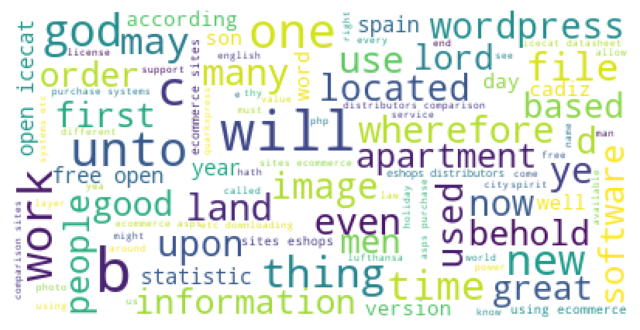

In [ ]:
# Helps to visualize the wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

wordcloud = WordCloud(max_font_size = 40, max_words=100, background_color="white").generate(text)
plt.figure(figsize=(8,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
text = ' '.join(sentences_de[:1000])

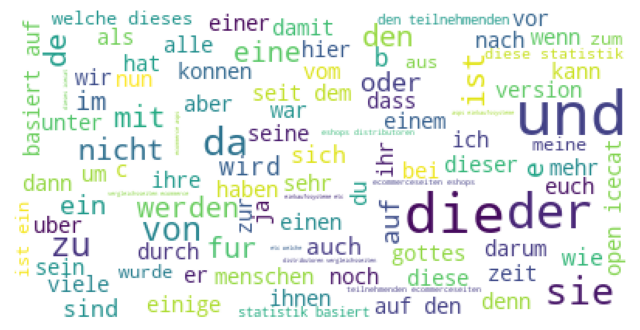

In [ ]:
wordcloud = WordCloud(max_font_size = 40, max_words=100, background_color="white").generate(text)
plt.figure(figsize=(8,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

***Step 3: NLP preprocessing***

In [ ]:
# Your code for creating DataFrames goes here
df_german = pd.DataFrame(sentences_de, columns=["german"])
df_english = pd.DataFrame(sentences_en, columns=["english"])

In [ ]:
df_german.head()

german
0  iron cement ist eine gebrauchsfertige paste di...
1  nach der aushartung schutzt iron cement die ko...
2  feuerfester reparaturkitt fur feuerungsanlagen...
3         der bau und die reparatur der autostrassen
4  die mitteilungen sollen den geschaftlichen kom...

In [ ]:
df_english.head()

english
0  iron cement is a ready for use paste which is ...
1  iron cement protects the ingot against the hot...
2  a fire restant repair cement for fire places o...
3            construction and repair of highways and
4       an announcement must be commercial character

In [ ]:
duplicate_german_count = df_german.duplicated().sum()
print("Duplicates in German dataset: ",duplicate_german_count)

duplicate_english_count = df_english.duplicated().sum()
print("Duplicates in English dataset: ",duplicate_english_count)

Duplicates in German dataset:  29
Duplicates in English dataset:  49


In [ ]:
df_german.drop_duplicates()
df_english.drop_duplicates()

english
0    iron cement is a ready for use paste which is ...
1    iron cement protects the ingot against the hot...
2    a fire restant repair cement for fire places o...
3              construction and repair of highways and
4         an announcement must be commercial character
..                                                 ...
995   but verily i say unto you that it is not need...
996   for i the lord have decreed in mine anger man...
997   nevertheless all flesh is in mine hand and he...
998   wherefore it is expedient that my servant sid...
999   but now verily i say it behooveth me that ye ...

[951 rows x 1 columns]

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\seshabhattark\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\seshabhattark\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\seshabhattark\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

#### **Lemmatize and remove the stop words using the NLTK library**

In [ ]:
# Step 1: Tokenization, Stop Words Removal, and Lemmatization
stop_words_german = set(stopwords.words('german'))
stop_words_english = set(stopwords.words('english'))


In [ ]:
lemmatizer_german = WordNetLemmatizer()
lemmatizer_english = WordNetLemmatizer()

In [ ]:
def preprocess_german(sentence):
    words = [lemmatizer_german.lemmatize(word) for word in sentence.split() if word not in stop_words_german]
    return ' '.join(words)

def preprocess_english(sentence):
    words = [lemmatizer_english.lemmatize(word) for word in sentence.split() if word not in stop_words_english]
    return ' '.join(words)


In [ ]:
df_german["german"] = df_german["german"].apply(preprocess_german)
df_english["english"] = df_english["english"].apply(preprocess_english)

#### **German WordCloud After stop words removal and lemmatization**

In [ ]:
all_texts = " ".join(texts for texts in df_german.german)
print ("There are {} words in the combination of all texts.".format(len(all_texts)))


There are 94777 words in the combination of all texts.


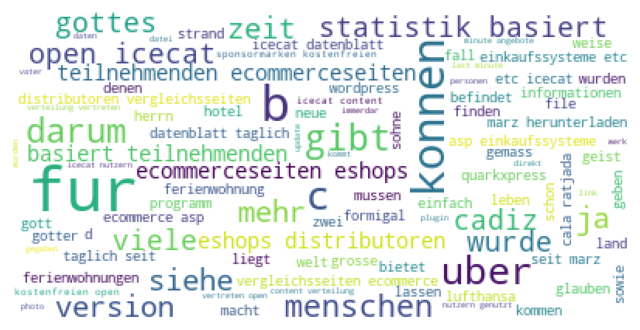

In [ ]:
wordcloud = WordCloud(max_font_size = 40, max_words=100, background_color="white").generate(all_texts)
plt.figure(figsize=(8,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### **English WordCloud After stop words removal and lemmatization**

In [ ]:
all_texts = " ".join(texts for texts in df_english.english)
print ("There are {} words in the combination of all texts.".format(len(all_texts)))


There are 83802 words in the combination of all texts.


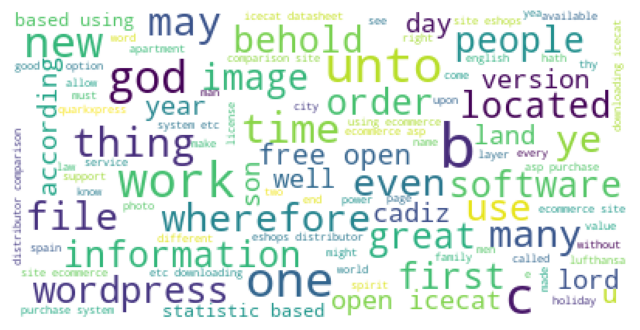

In [ ]:
wordcloud = WordCloud(max_font_size = 40, max_words=100, background_color="white").generate(all_texts)
plt.figure(figsize=(8,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### **Length of lines in German and English dataset**

In [ ]:
# empty lists
eng_l = []
deu_l = []

# populate the lists with sentence lengths
for i in df_english['english']:
    eng_l.append(len(i.split()))

for i in df_german['german']:
    deu_l.append(len(i.split()))

In [ ]:
length_df = pd.DataFrame({'eng':eng_l, 'deu':deu_l})
length_df.head()

eng  deu
0   16   12
1    9    8
2   10    8
3    3    3
4    4    6

#### **Tokenizing the Text**

In [ ]:
# Word Indexing
tokenizer_german = Tokenizer()
tokenizer_german.fit_on_texts(df_german['german'])

tokenizer_english = Tokenizer()
tokenizer_english.fit_on_texts(df_english['english'])

# Convert words to indices
df_german['german'] = tokenizer_german.texts_to_sequences(df_german['german'])
df_english['english'] = tokenizer_english.texts_to_sequences(df_english['english'])

# Vocabulary size
vocab_size_german = len(tokenizer_german.word_index) + 1
vocab_size_english = len(tokenizer_english.word_index) + 1


In [ ]:
!pip install plotly


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import plotly.subplots as sp
import plotly.graph_objs as go

# Assuming 'eng' and 'deu' are the names of the columns in length_df
column1 = 'eng'
column2 = 'deu'

# Create subplots with 2 rows and 1 column
fig = sp.make_subplots(rows=2, cols=1, subplot_titles=[f'Histogram for {column1}', f'Histogram for {column2}'])

# Add histograms to each subplot with hover information
histogram1 = go.Histogram(x=length_df[column1], xbins=dict(size=1), hoverinfo='x+y')
histogram2 = go.Histogram(x=length_df[column2], xbins=dict(size=1), hoverinfo='x+y')

fig.add_trace(histogram1, row=1, col=1)
fig.add_trace(histogram2, row=2, col=1)

# Calculate averages
average1 = length_df[column1].mean()
average2 = length_df[column2].mean()

# Add horizontal lines for averages
fig.add_shape(
    type='line',
    x0=average1,
    x1=average1,
    y0=0,
    y1=1,
    xref='x',
    yref='paper',
    line=dict(color='red', width=2, dash='dash'),
)

fig.add_shape(
    type='line',
    x0=average2,
    x1=average2,
    y0=0,
    y1=1,
    xref='x',
    yref='paper',
    line=dict(color='blue', width=2, dash='dash'),
)

# Update layout for better visualization
fig.update_layout(showlegend=False, height=600, width=800)

# Show the plot
fig.show()


#### **Padding the Text**

In [ ]:
max_length_de = 10
max_length_en = 10

#df_german['german'] = pad_sequences(df_german['german'], maxlen=max_length_de, padding='post')
#df_english['english'] = pad_sequences(df_english['english'], maxlen=max_length_en, padding='post')

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming df_german is your DataFrame
X_german = df_german["german"]

# Split the German text data into training and testing sets
X_train_german, X_test_german = train_test_split(X_german, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("X_train_german shape:", X_train_german.shape)
print("X_test_german shape:", X_test_german.shape)

Y_english = df_english["english"]

# Split the English labels into training and testing sets
Y_train_english, Y_test_english = train_test_split(Y_english, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Y_train_english shape:", Y_train_english.shape)
print("Y_test_english shape:", Y_test_english.shape)



X_train_german shape: (800,)
X_test_german shape: (200,)
Y_train_english shape: (800,)
Y_test_english shape: (200,)


In [ ]:
X_train_german_padded = pad_sequences(X_train_german, maxlen=max_length_en, padding='post')
Y_train_english_padded = pad_sequences(Y_train_english, maxlen=max_length_en, padding='post')

# Check the shapes
print("Shape of X_train_german_padded:", X_train_german_padded.shape)
print("Shape of Y_train_english_padded:", Y_train_english_padded.shape)


Shape of X_train_german_padded: (800, 10)
Shape of Y_train_english_padded: (800, 10)


***Step 4: Design, train and test simple RNN & LSTM model***

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense,RepeatVector
from tensorflow.keras.optimizers import Adam
from keras import optimizers


# build NMT model
def define_model(in_vocab,out_vocab, in_timesteps,out_timesteps,units):
    model = Sequential()
    model.add(Embedding(in_vocab, units, input_length=in_timesteps, mask_zero=True))
    model.add(LSTM(units))
    model.add(RepeatVector(out_timesteps))
    model.add(LSTM(units, return_sequences=True))
    model.add(Dense(out_vocab, activation='softmax'))
    return model

In [ ]:
# model compilation
model = define_model(vocab_size_german, vocab_size_english, max_length_de, max_length_en, 128)

In [ ]:
rms = optimizers.RMSprop(lr=0.001)
model.compile(optimizer=rms, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 10, 128)           635136    
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 repeat_vector_1 (RepeatVec  (None, 10, 128)           0         
 tor)                                                            
                                                                 
 lstm_4 (LSTM)               (None, 10, 128)           131584    
                                                                 
 dense_3 (Dense)             (None, 10, 3591)          463239    
                                                                 
Total params: 1361543 (5.19 MB)
Trainable params: 1361543 (5.19 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
!pip install pydot


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


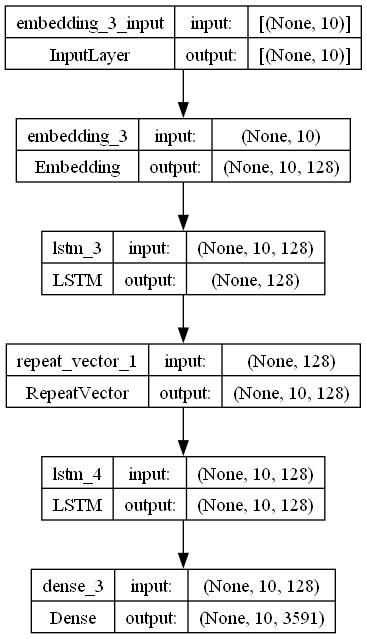

In [ ]:
 # plotting the model architecture
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

filename = 'model_1'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# train model
history = model.fit(X_train_german_padded, Y_train_english_padded,
                    epochs=50, batch_size=128, validation_split = 0.2,callbacks=[checkpoint,early_stopping],
                    verbose=1)

Epoch 1/50
5/5 [==============================] - ETA: 0s - loss: 8.1815 - accuracy: 0.1164
Epoch 1: val_loss improved from inf to 8.17403, saving model to model_1
INFO:tensorflow:Assets written to: model_1\assets


INFO:tensorflow:Assets written to: model_1\assets


5/5 [==============================] - 20s 4s/step - loss: 8.1815 - accuracy: 0.1164 - val_loss: 8.1740 - val_accuracy: 0.1569
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 8.1674 - accuracy: 0.1441
Epoch 2: val_loss improved from 8.17403 to 8.15581, saving model to model_1
INFO:tensorflow:Assets written to: model_1\assets


INFO:tensorflow:Assets written to: model_1\assets


5/5 [==============================] - 12s 3s/step - loss: 8.1674 - accuracy: 0.1441 - val_loss: 8.1558 - val_accuracy: 0.1569
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 8.1408 - accuracy: 0.1441
Epoch 3: val_loss improved from 8.15581 to 8.10316, saving model to model_1
INFO:tensorflow:Assets written to: model_1\assets


INFO:tensorflow:Assets written to: model_1\assets


5/5 [==============================] - 13s 3s/step - loss: 8.1408 - accuracy: 0.1441 - val_loss: 8.1032 - val_accuracy: 0.1569
Epoch 4/50
5/5 [==============================] - ETA: 0s - loss: 8.0224 - accuracy: 0.1441
Epoch 4: val_loss improved from 8.10316 to 7.79041, saving model to model_1
INFO:tensorflow:Assets written to: model_1\assets


INFO:tensorflow:Assets written to: model_1\assets


5/5 [==============================] - 12s 3s/step - loss: 8.0224 - accuracy: 0.1441 - val_loss: 7.7904 - val_accuracy: 0.1569
Epoch 5/50
5/5 [==============================] - ETA: 0s - loss: 7.5739 - accuracy: 0.1441
Epoch 5: val_loss improved from 7.79041 to 7.22458, saving model to model_1
INFO:tensorflow:Assets written to: model_1\assets


INFO:tensorflow:Assets written to: model_1\assets


5/5 [==============================] - 13s 3s/step - loss: 7.5739 - accuracy: 0.1441 - val_loss: 7.2246 - val_accuracy: 0.1569
Epoch 6/50
5/5 [==============================] - ETA: 0s - loss: 7.1131 - accuracy: 0.1441
Epoch 6: val_loss improved from 7.22458 to 7.04216, saving model to model_1
INFO:tensorflow:Assets written to: model_1\assets


INFO:tensorflow:Assets written to: model_1\assets


5/5 [==============================] - 13s 3s/step - loss: 7.1131 - accuracy: 0.1441 - val_loss: 7.0422 - val_accuracy: 0.1569
Epoch 7/50
5/5 [==============================] - ETA: 0s - loss: 6.9552 - accuracy: 0.1441
Epoch 7: val_loss improved from 7.04216 to 7.00373, saving model to model_1
INFO:tensorflow:Assets written to: model_1\assets


INFO:tensorflow:Assets written to: model_1\assets


5/5 [==============================] - 12s 3s/step - loss: 6.9552 - accuracy: 0.1441 - val_loss: 7.0037 - val_accuracy: 0.1569
Epoch 8/50
5/5 [==============================] - ETA: 0s - loss: 6.8758 - accuracy: 0.1441
Epoch 8: val_loss improved from 7.00373 to 6.99462, saving model to model_1
INFO:tensorflow:Assets written to: model_1\assets


INFO:tensorflow:Assets written to: model_1\assets


5/5 [==============================] - 12s 3s/step - loss: 6.8758 - accuracy: 0.1441 - val_loss: 6.9946 - val_accuracy: 0.1569
Epoch 9/50
5/5 [==============================] - ETA: 0s - loss: 6.8229 - accuracy: 0.1441
Epoch 9: val_loss did not improve from 6.99462
5/5 [==============================] - 1s 105ms/step - loss: 6.8229 - accuracy: 0.1441 - val_loss: 6.9969 - val_accuracy: 0.1569
Epoch 10/50
5/5 [==============================] - ETA: 0s - loss: 6.7899 - accuracy: 0.1441
Epoch 10: val_loss did not improve from 6.99462
5/5 [==============================] - 1s 113ms/step - loss: 6.7899 - accuracy: 0.1441 - val_loss: 7.0043 - val_accuracy: 0.1569
Epoch 11/50
5/5 [==============================] - ETA: 0s - loss: 6.7659 - accuracy: 0.1441
Epoch 11: val_loss did not improve from 6.99462
5/5 [==============================] - 1s 111ms/step - loss: 6.7659 - accuracy: 0.1441 - val_loss: 7.0104 - val_accuracy: 0.1569
Epoch 12/50
5/5 [==============================] - ETA: 0s - loss

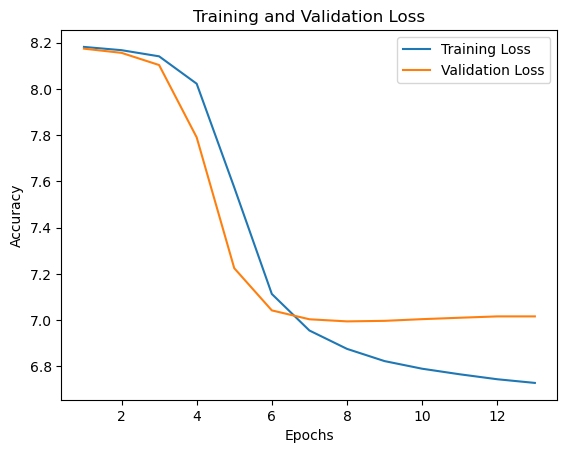

In [ ]:
# Get the number of epochs
epochs = range(1, len(history.history['loss']) + 1)

# Plot training and validation accuracy
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

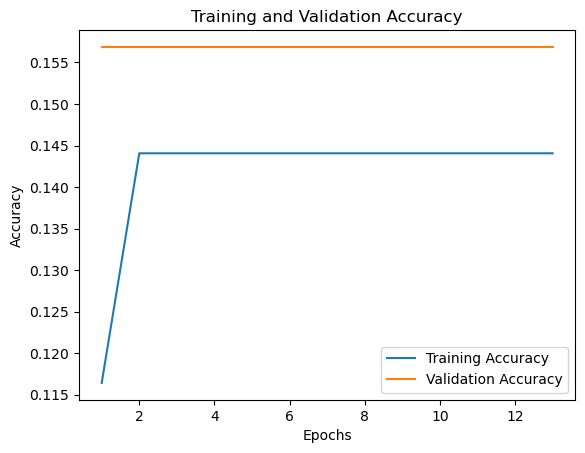

In [ ]:
# Access the accuracy values from the history
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Get the number of epochs
epochs = range(1, len(training_accuracy) + 1)

# Plot training and validation accuracy
plt.plot(epochs, training_accuracy, label='Training Accuracy')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model
model = load_model('model_1')

In [ ]:
X_test_german_padded = pad_sequences(X_test_german, maxlen=max_length_de, padding='post')
Y_test_english_padded = pad_sequences(Y_test_english, maxlen=max_length_en, padding='post')

# Check the shapes
print("Shape of X_test_german_padded:", X_test_german_padded.shape)
print("Shape of Y_test_english_padded:", Y_test_english_padded.shape)

Shape of X_test_german_padded: (200, 10)
Shape of Y_test_english_padded: (200, 10)


In [ ]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_test_german_padded, Y_test_english_padded)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

7/7 [==============================] - 2s 15ms/step - loss: 6.8923 - accuracy: 0.1595
Validation Accuracy: 15.95%


In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Embedding,Dropout,Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


# Define the RNN model
rnn_model = Sequential([
    Embedding(input_dim=vocab_size_german, output_dim=vocab_size_english, input_length=max_length_de),
    SimpleRNN(units=64, activation='tanh'),
    Dense(max_length_en, activation='softmax')
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
rnn_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

print(X_train_german_padded.shape)
print(Y_train_english_padded.shape)


# Train the model
history_rnn_model = rnn_model.fit(X_train_german_padded, Y_train_english_padded , epochs=100, batch_size=64, validation_split=0.2)



(800, 10)
(800, 10)
Epoch 1/100
10/10 [==============================] - 3s 186ms/step - loss: -428.3356 - accuracy: 0.1516 - val_loss: -1007.7194 - val_accuracy: 0.1312
Epoch 2/100
10/10 [==============================] - 2s 165ms/step - loss: -1609.2599 - accuracy: 0.1516 - val_loss: -1953.4846 - val_accuracy: 0.1125
Epoch 3/100
10/10 [==============================] - 2s 172ms/step - loss: -2284.1870 - accuracy: 0.1172 - val_loss: -2617.4688 - val_accuracy: 0.0938
Epoch 4/100
10/10 [==============================] - 2s 169ms/step - loss: -2861.7200 - accuracy: 0.1125 - val_loss: -3155.3320 - val_accuracy: 0.1250
Epoch 5/100
10/10 [==============================] - 2s 173ms/step - loss: -3414.9480 - accuracy: 0.1203 - val_loss: -3726.0571 - val_accuracy: 0.1187
Epoch 6/100
10/10 [==============================] - 2s 165ms/step - loss: -3910.7173 - accuracy: 0.1688 - val_loss: -4218.7500 - val_accuracy: 0.1250
Epoch 7/100
10/10 [==============================] - 2s 167ms/step - loss: 

In [ ]:
# Evaluate the model
train_loss, train_accuracy = rnn_model.evaluate(X_train_german_padded, Y_train_english_padded)
print(f'Train Accuracy: {train_accuracy * 100:.2f}%')
test_loss, test_accuracy = rnn_model.evaluate(X_test_german_padded, Y_test_english_padded)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

25/25 [==============================] - 0s 5ms/step - loss: -47167.6836 - accuracy: 0.1225
Train Accuracy: 12.25%
7/7 [==============================] - 0s 5ms/step - loss: -43572.5156 - accuracy: 0.1050
Test Accuracy: 10.50%


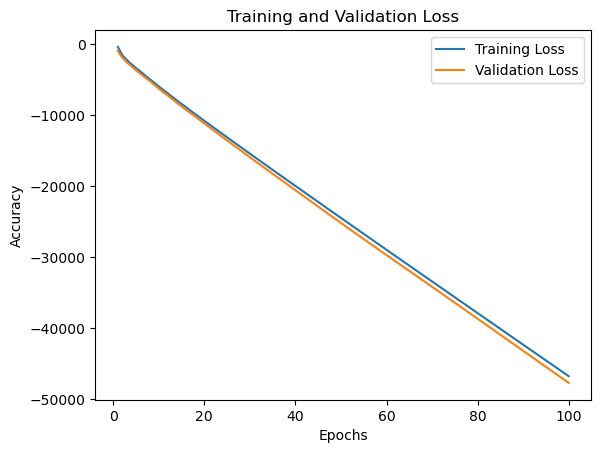

In [ ]:
# Get the number of epochs
epochs = range(1, len(history_rnn_model.history['loss']) + 1)

# Plot training and validation accuracy
plt.plot(epochs, history_rnn_model.history['loss'], label='Training Loss')
plt.plot(epochs, history_rnn_model.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

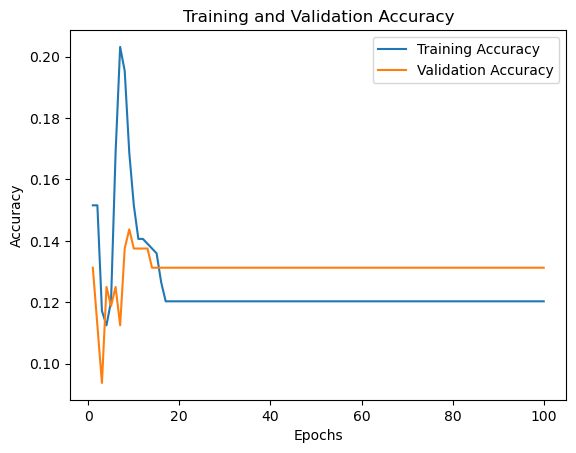

In [ ]:
# Access the accuracy values from the history
training_accuracy = history_rnn_model.history['accuracy']
validation_accuracy = history_rnn_model.history['val_accuracy']

# Get the number of epochs
epochs = range(1, len(history_rnn_model.history['accuracy']) + 1)

# Plot training and validation accuracy
plt.plot(epochs, training_accuracy, label='Training Accuracy')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Adjust model architecture
relu_model = Sequential([
    Embedding(input_dim=vocab_size_german, output_dim=vocab_size_english, input_length=max_length_de),
    LSTM(units=64),
    Dense(units=max_length_en, activation='relu')  # Change units to 1 and activation to 'sigmoid' for binary classification
])

# Compile the model
relu_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='accuracy', patience=5)


# Train the model
history_relu_model = relu_model.fit(X_train_german_padded,Y_train_english_padded, epochs=50, batch_size=64, validation_split=0.2,callbacks=[early_stopping])


Epoch 1/50
10/10 [==============================] - 5s 255ms/step - loss: 4067.6660 - accuracy: 0.1047 - val_loss: 1397.0193 - val_accuracy: 0.1250
Epoch 2/50
10/10 [==============================] - 2s 181ms/step - loss: 86.0425 - accuracy: 0.2016 - val_loss: -1719.9954 - val_accuracy: 0.1187
Epoch 3/50
10/10 [==============================] - 2s 181ms/step - loss: -2513.0586 - accuracy: 0.1703 - val_loss: -3438.8267 - val_accuracy: 0.0812
Epoch 4/50
10/10 [==============================] - 2s 185ms/step - loss: -6693.4248 - accuracy: 0.1578 - val_loss: -6425.3159 - val_accuracy: 0.0812
Epoch 5/50
10/10 [==============================] - 2s 179ms/step - loss: -8303.7520 - accuracy: 0.1391 - val_loss: -8334.8428 - val_accuracy: 0.0688
Epoch 6/50
10/10 [==============================] - 2s 176ms/step - loss: -9570.2373 - accuracy: 0.1281 - val_loss: -10205.7646 - val_accuracy: 0.0812
Epoch 7/50
10/10 [==============================] - 2s 180ms/step - loss: -10457.9668 - accuracy: 0.0891

In [ ]:
# Evaluate the model
train_loss, train_accuracy = rnn_model.evaluate(X_train_german_padded, Y_train_english_padded)
print(f'Train Accuracy: {train_accuracy * 100:.2f}%')
test_loss, test_accuracy = rnn_model.evaluate(X_test_german_padded, Y_test_english_padded)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

25/25 [==============================] - 0s 6ms/step - loss: -47167.6836 - accuracy: 0.1225
Train Accuracy: 12.25%
7/7 [==============================] - 0s 5ms/step - loss: -43572.5156 - accuracy: 0.1050
Test Accuracy: 10.50%


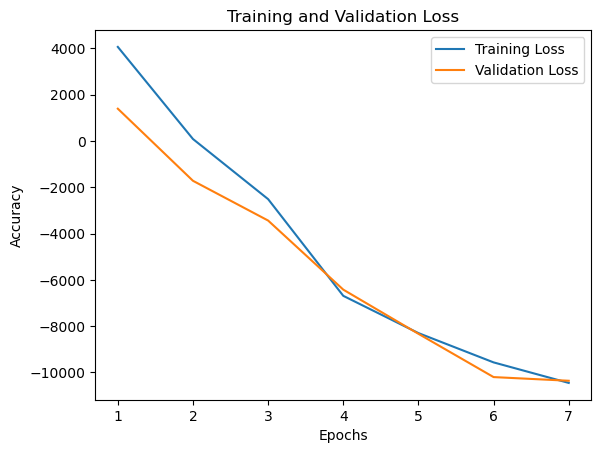

In [ ]:
# Get the number of epochs
epochs = range(1, len(history_relu_model.history['loss']) + 1)

# Plot training and validation accuracy
plt.plot(epochs, history_relu_model.history['loss'], label='Training Loss')
plt.plot(epochs, history_relu_model.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

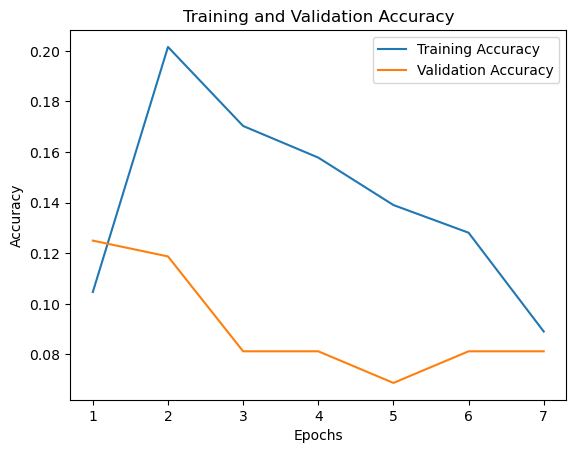

In [ ]:
# Access the accuracy values from the history
training_accuracy = history_relu_model.history['accuracy']
validation_accuracy = history_relu_model.history['val_accuracy']

# Get the number of epochs
epochs = range(1, len(training_accuracy) + 1)

# Plot training and validation accuracy
plt.plot(epochs, training_accuracy, label='Training Accuracy')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()